<a href="https://colab.research.google.com/github/chebbin/datasci_5_statistics/blob/main/code/507_anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo

In [39]:
# Bring in data
from ucimlrepo import fetch_ucirepo

# Bring in packages for dataframe and stats
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

# For visualization
import matplotlib.pyplot as plt

In [3]:
# fetch dataset
cirrhosis_patient_survival_prediction = fetch_ucirepo(id=878)

In [4]:
# data (as pandas dataframes)
X = cirrhosis_patient_survival_prediction.data.features
y = cirrhosis_patient_survival_prediction.data.targets

In [5]:
# metadata
print(cirrhosis_patient_survival_prediction.metadata)

{'uci_id': 878, 'name': 'Cirrhosis Patient Survival Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1', 'data_url': 'https://archive.ics.uci.edu/static/public/878/data.csv', 'abstract': 'Utilize 17 clinical features for predicting survival state of patients with liver cirrhosis. The survival states include 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation).', 'area': 'Life Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 418, 'num_features': 17, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Age', 'Sex'], 'target_col': ['Status'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Sep 22 2023', 'dataset_doi': '10.24432/C5R02G', 'creators': ['E. Dickson', 'P. Grambsch', 'T. Fleming', 'L. Fisher', 'A. Langworthy'], 'intro_paper': {'title': 'Prognosis in p

In [6]:
# variable information
print(cirrhosis_patient_survival_prediction.variables)

             name     role         type demographic  \
0              ID       ID      Integer        None   
1          N_Days    Other      Integer        None   
2          Status   Target  Categorical        None   
3            Drug  Feature  Categorical        None   
4             Age  Feature      Integer         Age   
5             Sex  Feature  Categorical         Sex   
6         Ascites  Feature  Categorical        None   
7    Hepatomegaly  Feature  Categorical        None   
8         Spiders  Feature  Categorical        None   
9           Edema  Feature  Categorical        None   
10      Bilirubin  Feature   Continuous        None   
11    Cholesterol  Feature      Integer        None   
12        Albumin  Feature   Continuous        None   
13         Copper  Feature      Integer        None   
14       Alk_Phos  Feature   Continuous        None   
15           SGOT  Feature   Continuous        None   
16  Tryglicerides  Feature      Integer        None   
17      Pl

In [11]:
df = pd.read_csv('/content/cirrhosis.csv')
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [12]:
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [13]:
df.columns


Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [21]:
df = pd.DataFrame(X)
df

,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261,2.60,156,1718.0,137.95,172,190,12.2,4.0
1,D-penicillamine,20617,F,N,Y,Y,N,1.1,302,4.14,54,7394.8,113.52,88,221,10.6,3.0
2,D-penicillamine,25594,M,N,N,N,S,1.4,176,3.48,210,516.0,96.10,55,151,12.0,4.0
3,D-penicillamine,19994,F,N,Y,Y,S,1.8,244,2.54,64,6121.8,60.63,92,183,10.3,4.0
4,Placebo,13918,F,N,Y,Y,N,3.4,279,3.53,143,671.0,113.15,72,136,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174,10.9,3.0
414,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180,11.2,4.0
415,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143,9.9,3.0
416,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269,10.4,3.0


## Variable of interest

dv = albumin
iv = edema

In [43]:
# Shapiro test p value is below .05 indicating an abnormal distribution
stats.shapiro(df['Albumin'])

ShapiroResult(statistic=0.9865185618400574, pvalue=0.00063910405151546)

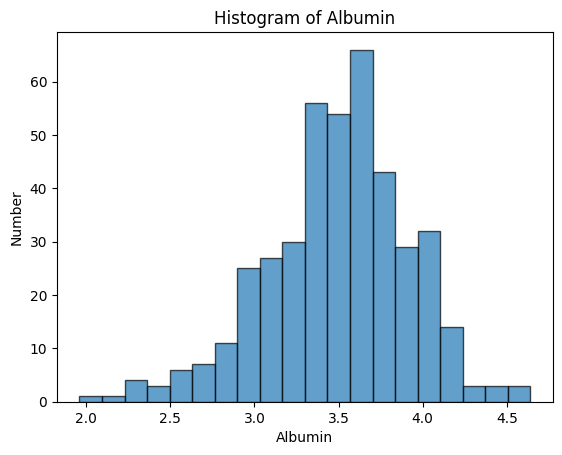

In [44]:
# Histogram
plt.hist(df['Albumin'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Albumin')
plt.xlabel('Albumin')
plt.ylabel('Number')
plt.show()

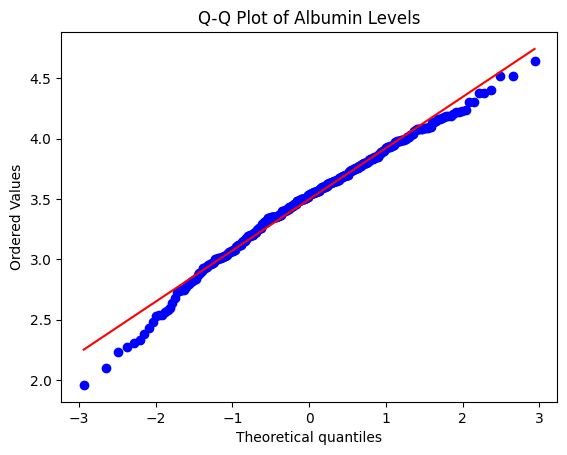

In [35]:
# Q-Q Plot
stats.probplot(df['Albumin'], plot=plt)
plt.title('Q-Q Plot of Albumin Levels')
plt.show()

In [45]:
# The Shapiro-Wilk test P value indicates that two of the three options are normally distributed as they are greater than .05

groups = df.groupby(['Edema'])

for (edema_status), group_df in groups:
    _, p_value = stats.shapiro(group_df['Albumin'])

    print(f"Group ({edema_status}):")
    print(f"P-value from Shapiro-Wilk Test: {p_value}\n")

Group (N):
P-value from Shapiro-Wilk Test: 0.007273807656019926

Group (S):
P-value from Shapiro-Wilk Test: 0.4936281144618988

Group (Y):
P-value from Shapiro-Wilk Test: 0.9617068767547607



<ipython-input-45-08137d4b789d>:5: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for (edema_status), group_df in groups:


In [46]:
# Levene's Test shows that there is normality of variance
stats.levene(
    df['Albumin'][df['Edema'] == 'Y'],
    df['Albumin'][df['Edema'] == 'N'],
    df['Albumin'][df['Edema'] == 'S']
)

print(f"Levenes Test P-value: {p_value} \n")

Levenes Test P-value: 0.9617068767547607 



# Anova with one independent variable

## Hypothesis: the Albumin level differs across patients with edema that have varying levels of responsiveness to diuretics.

Null hypothesis: The albumin level shows no difference across patients with edema with varying levels of responsiveness to diuretics.
Two ways to do this are listed below

In [14]:
stats.f_oneway(df['Albumin'][df['Edema'] == 'Y'],
               df['Albumin'][df['Edema'] == 'N'],
               df['Albumin'][df['Edema'] == 'S'])

F_onewayResult(statistic=27.900303674706414, pvalue=4.278579186356649e-12)

## The large F value of 27.9 indicates that the variation among the group is more than expected by chance.

The small P value which is less than .05 indicates that the result is significant.

In [42]:
model = ols('Albumin ~ C(Edema)', data=df).fit()

# Performing the one-way ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

## Result shows that albumin level is affected by the presence of edema and how it is affected by diuretics as indicated by the high F value and p value that is smaller than .0

             sum_sq     df          F        PR(>F)
C(Edema)   8.926019    2.0  27.900304  4.278579e-12
Residual  66.384542  415.0        NaN           NaN
